<a href="https://colab.research.google.com/github/jacdiste/NeuralTennis/blob/main/NeuralTennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NeuralTennis**

In [44]:
!pip install --quiet torch torchvision opencv-python-headless matplotlib plotly albumentations scikit-learn ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.7 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [45]:
import os

BASE_DIR = "/content/drive/MyDrive/NeuralTennis"
for sub in ["input", "models", "output"]:
    os.makedirs(f"{BASE_DIR}/{sub}", exist_ok=True)

In [46]:
import cv2

video_path = f"{BASE_DIR}/input/4.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError(f"Cannot open {video_path}")
ret, frame = cap.read()
cap.release()
if not ret:
    raise IOError("Cannot read the first frame")
print("Video loaded – resolution:", frame.shape[1], "×", frame.shape[0])

Video loaded – resolution: 1920 × 1080


In [47]:
import cv2

def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

def save_video(output_video_frames, output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, 30, (output_video_frames[0].shape[1], output_video_frames[0].shape[0]))
    for frame in output_video_frames:
        out.write(frame)
    out.release()
    print(f"Video saved to {output_video_path}")


In [ ]:
from ultralytics import YOLO

!yolo task=detect mode=train model=yolov5x.pt data=/content/drive/MyDrive/NeuralTennis/data/data.yaml epochs=100 imgsz=640 batch=8

PRO TIP 💡 Replace 'model=yolov5x.pt' with new 'model=yolov5xu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/NeuralTennis/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf

In [ ]:
from ultralytics import YOLO

!yolo task=detect mode=train model=/content/drive/MyDrive/NeuralTennis/models/best.pt data=/content/drive/MyDrive/NeuralTennis/data2/ball_detection.yaml epochs=50 imgsz=960 batch=8 project=/content/drive/MyDrive/NeuralTennis/models/ball_training name=run2

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/NeuralTennis/data2/ball_detection.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/NeuralTennis/models/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas

In [1]:
# 2. Import e impostazioni
import cv2, os, glob, math

# Cartelle sul tuo Drive
input_dir   = '/content/drive/MyDrive/NeuralTennis/input'
output_dir  = '/content/drive/MyDrive/NeuralTennis/images_to_annotate'
os.makedirs(output_dir, exist_ok=True)

# Parametri
total_target     = 50
video_paths      = sorted(glob.glob(os.path.join(input_dir, '*.mp4')))
num_videos       = len(video_paths)
per_video_target = math.ceil(total_target / num_videos)

global_saved = 0

# 3. Loop su tutti i video, fermandosi a 50 frame totali
for video_path in video_paths:
    if global_saved >= total_target:
        break

    cap       = cv2.VideoCapture(video_path)
    total     = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step      = max(1, total // per_video_target)
    basename  = os.path.splitext(os.path.basename(video_path))[0]

    saved_in_vid = 0
    frame_idx    = 0
    while cap.isOpened() and saved_in_vid < per_video_target and global_saved < total_target:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % step == 0:
            fname = f'{basename}_frame_{saved_in_vid:02d}.jpg'
            cv2.imwrite(os.path.join(output_dir, fname), frame)
            saved_in_vid += 1
            global_saved += 1
        frame_idx += 1

    cap.release()
    print(f'Video {basename}: estratti {saved_in_vid} frame')

print(f'Totale immagini estratte in {output_dir}: {global_saved}')


Mounted at /content/drive
Video 1: estratti 9 frame
Video 2: estratti 9 frame
Video 3: estratti 9 frame
Video 4: estratti 9 frame
Video 5: estratti 9 frame
Video 6: estratti 5 frame
Totale immagini estratte in /content/drive/MyDrive/NeuralTennis/images_to_annotate: 50


In [4]:
import json, os, glob
from pathlib import Path

# Path to your images and your manually annotated JSONs
img_dir    = '/content/drive/MyDrive/NeuralTennis/images_to_annotate'
ann_dir    = img_dir  # immagini e JSON vivono nella stessa cartella

# Loop sui 6 match (assumiamo i nomi 1_, 2_, …, 6_)
for match_id in range(1, 7):
    prefix     = f"{match_id}_frame_"
    master_j   = Path(ann_dir) / f"{prefix}00.json"
    if not master_j.exists():
        print(f"[WARN] Master JSON not found for match {match_id} → {master_j}")
        continue

    # Carica il master JSON
    with open(master_j, 'r') as f:
        master_ann = json.load(f)

    # Trova tutti i JPG di questo match
    pattern = str(Path(img_dir) / f"{prefix}*.jpg")
    for img_path in sorted(glob.glob(pattern)):
        target_j = img_path.replace('.jpg', '.json')
        # Se c’è già un JSON (p.es. perché lo hai corretto o perché hai rimosso i frame),
        # lo salti
        if os.path.exists(target_j):
            continue

        # Duplichi il master, aggiornando solo imagePath
        new_ann = master_ann.copy()
        new_ann['imagePath'] = os.path.basename(img_path)
        # (height/width/liquid non cambiano perché tutti i frame hanno stesse dim.)
        with open(target_j, 'w') as out:
            json.dump(new_ann, out, indent=2)
        print(f"Created {os.path.basename(target_j)}")

print("Done.")


Created 1_frame_01.json
Created 1_frame_02.json
Created 1_frame_03.json
Created 1_frame_04.json
Created 1_frame_05.json
Created 1_frame_06.json
Created 1_frame_07.json
Created 1_frame_08.json
Created 2_frame_01.json
Created 2_frame_02.json
Created 2_frame_03.json
Created 2_frame_04.json
Created 2_frame_05.json
Created 2_frame_06.json
Created 2_frame_07.json
Created 2_frame_08.json
Created 3_frame_01.json
Created 3_frame_02.json
Created 3_frame_03.json
Created 3_frame_04.json
Created 3_frame_05.json
Created 3_frame_06.json
Created 3_frame_07.json
Created 3_frame_08.json
Created 4_frame_01.json
Created 4_frame_02.json
Created 4_frame_03.json
Created 4_frame_04.json
Created 4_frame_05.json
Created 4_frame_06.json
Created 5_frame_01.json
Created 5_frame_02.json
Created 5_frame_03.json
Created 5_frame_04.json
Created 5_frame_05.json
Created 5_frame_06.json
Created 5_frame_07.json
Created 5_frame_08.json
Created 6_frame_01.json
Created 6_frame_02.json
Created 6_frame_03.json
Created 6_frame_

In [5]:
import json
from pathlib import Path

def labelme_to_coco(labelme_dir: str, output_json: str):
    """
    Convert all LabelMe JSON files in a directory to a single COCO Keypoints JSON.
    Uses the imageWidth/imageHeight fields (1920x1080) to normalize later.
    """
    coco = {
        "images": [],
        "annotations": [],
        "categories": [{
            "id": 1,
            "name": "tennis_court",
            "keypoints": [f"kp{i}" for i in range(14)],
            "skeleton": []
        }]
    }
    ann_id = 1
    img_id = 1

    for jm_file in sorted(Path(labelme_dir).glob("*.json")):
        data = json.load(open(jm_file))
        filename = data['imagePath']
        height = data['imageHeight']  # dovrebbe essere 1080
        width  = data['imageWidth']   # dovrebbe essere 1920

        coco["images"].append({
            "id": img_id,
            "file_name": filename,
            "height": height,
            "width": width
        })

        kpts = [0] * (14 * 3)
        for shape in data["shapes"]:
            idx = int(shape["label"].replace("kp", ""))
            x, y = shape["points"][0]
            kpts[idx*3]   = x
            kpts[idx*3+1] = y
            kpts[idx*3+2] = 2

        coco["annotations"].append({
            "id": ann_id,
            "image_id": img_id,
            "category_id": 1,
            "keypoints": kpts,
            "num_keypoints": sum(1 for v in kpts[2::3] if v>0),
            "bbox": [0, 0, 0, 0],
            "area": 0
        })

        ann_id += 1
        img_id += 1

    with open(output_json, "w") as f:
        json.dump(coco, f)
    print(f"Saved COCO annotations to {output_json}")

# Usage:
labelme_dir  = "/content/drive/MyDrive/NeuralTennis/images_to_annotate"
output_json = "/content/drive/MyDrive/NeuralTennis/court_keypoints_coco.json"
labelme_to_coco(labelme_dir, output_json)


Saved COCO annotations to /content/drive/MyDrive/NeuralTennis/court_keypoints_coco.json


In [24]:
# === Cell 1: Dataset & DataLoader ===
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as TF
from pycocotools.coco import COCO

class CourtKeypointDataset(Dataset):
    def __init__(self, images_dir, ann_file, img_size=(360,640)):
        self.coco = COCO(ann_file)
        self.ids  = list(self.coco.imgs.keys())
        self.images_dir = images_dir
        self.img_h, self.img_w = img_size

    def __len__(self): return len(self.ids)

    def __getitem__(self, idx):
        img_info = self.coco.loadImgs(self.ids[idx])[0]
        ann_id   = self.coco.getAnnIds(imgIds=img_info['id'])[0]
        ann      = self.coco.loadAnns(ann_id)[0]
        path     = os.path.join(self.images_dir, img_info['file_name'])
        img      = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        img      = cv2.resize(img, (self.img_w, self.img_h))

        # estrai i 14 keypoint normalizzati
        kpts = np.array(ann['keypoints']).reshape(-1,3)
        kpts[:,0] *= (self.img_w  / img_info['width'])
        kpts[:,1] *= (self.img_h  / img_info['height'])

        # crea 15 heatmap full‑res: 14 punti + 1 canale zero
        heatmaps = np.zeros((15, self.img_h, self.img_w), dtype=np.float32)
        for i, (x,y,v) in enumerate(kpts):
            if v>0:
                xi, yi = int(x), int(y)
                if 0<=xi<self.img_w and 0<=yi<self.img_h:
                    heatmaps[i, yi, xi] = 1.0
        # Gaussian blur per ogni canale
        for i in range(15):
            heatmaps[i] = cv2.GaussianBlur(heatmaps[i], (7,7), 0)

        return TF.to_tensor(img), torch.from_numpy(heatmaps)

images_dir = "/content/drive/MyDrive/NeuralTennis/images_to_annotate"
ann_file   = "/content/drive/MyDrive/NeuralTennis/court_keypoints_coco.json"

train_dataset = CourtKeypointDataset(images_dir, ann_file)
train_loader  = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

# sanity check: ora imgs e hms hanno la stessa shape
imgs, hms = next(iter(train_loader))
print("imgs:", imgs.shape, "hms:", hms.shape)
# dovrebbe stampare: imgs: torch.Size([4,3,360,640])  hms: torch.Size([4,15,360,640])


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
imgs: torch.Size([4, 3, 360, 640]) hms: torch.Size([4, 15, 360, 640])


In [5]:
# scarica il codice con la definizione esatta della rete
!git clone https://github.com/yastrebksv/TennisCourtDetector.git /content/TennisCourtDetector

import sys
sys.path.insert(0, '/content/TennisCourtDetector')

Cloning into '/content/TennisCourtDetector'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 31 (delta 1), reused 1 (delta 1), pack-reused 21 (from 2)
Receiving objects: 100% (31/31), 23.44 MiB | 22.14 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [25]:
# importa la rete esatta usata nel checkpoint
from tracknet import BallTrackerNet
import torch

device = 'cuda'
# Modified the output channels to 15 to match the pretrained model
model = BallTrackerNet(out_channels=15).to(device)

In [26]:
import torch
from collections import OrderedDict

ckpt_path = "/content/drive/MyDrive/NeuralTennis/models/model_tennis_court_det.pt"
state_dict = torch.load(ckpt_path, map_location=device)

# se per caso ci fossero prefissi "module.", li rimuoviamo:
new_sd = OrderedDict()
for k, v in state_dict.items():
    nk = k.replace("module.", "")
    new_sd[nk] = v

model.load_state_dict(new_sd)
print("Pretrained weights loaded!")

Pretrained weights loaded!


In [27]:
model.eval()
imgs, hms = next(iter(train_loader))      # imgs: [B,3,H,W], hms: [B,15,Hm,Wm]
preds = model(imgs.to(device))            # preds: [B,15,Hm,Wm]
print("preds.shape =", preds.shape)

preds.shape = torch.Size([4, 15, 360, 640])


In [29]:
import numpy as np

hm0 = preds[0,0].detach().cpu().numpy()    # heatmap del kp0
y,x = np.unravel_index(hm0.argmax(), hm0.shape)
print(f"kp0 predicted at heatmap coords (x={x}, y={y})")
# Se vuoi, riconverti in pixel d'immagine:
x_img = x / hm0.shape[1] * 640
y_img = y / hm0.shape[0] * 360
print(f"→ in resized image: ({x_img:.1f}, {y_img:.1f})")


kp0 predicted at heatmap coords (x=158, y=92)
→ in resized image: (158.0, 92.0)


kp0 at pixel coords (x=158, y=92)


(np.float64(-0.5), np.float64(639.5), np.float64(359.5), np.float64(-0.5))

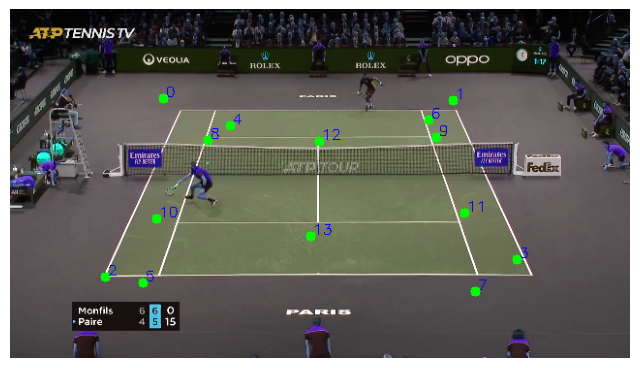

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1) estrai heatmap e fai l’argmax
hm0 = preds[0,0].detach().cpu().numpy()   # shape (360,640)
y, x = np.unravel_index(hm0.argmax(), hm0.shape)

# 2) usa direttamente x,y come pixel nella resized image
x_img, y_img = x, y
print(f"kp0 at pixel coords (x={x_img}, y={y_img})")

# 3) prepara immagine contigua per OpenCV/Matplotlib
img = imgs[0].permute(1,2,0).cpu().numpy() * 255
img = img.astype(np.uint8)
img = np.ascontiguousarray(img)

# 4) disegna tutti i keypoint per avere un’idea generale
for i in range(14):
    hm = preds[0,i].detach().cpu().numpy()
    yi_, xi_ = np.unravel_index(hm.argmax(), hm.shape)
    cv2.circle(img, (xi_, yi_), 5, (0,255,0), -1)
    cv2.putText(img, str(i), (xi_+2, yi_-2),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

# 5) visualizza con Matplotlib
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')


In [33]:
# Cell: Fine‑tuning Phase 1 (freeze backbone)
import torch.optim as optim, torch.nn as nn

# freeze all backbone layers
for p in features.parameters():
    p.requires_grad = False

optimizer = optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-4, weight_decay=1e-4
)
criterion = nn.MSELoss()

best_loss = float('inf')
for epoch in range(1, 9):   # 8 epochs
    model.train()
    running_loss = 0.0
    for imgs, hms in train_loader:
        imgs, hms = imgs.to(device), hms.to(device)
        preds = model(imgs)
        loss  = criterion(preds, hms)  # hms ha 15 canali, compreso uno zero‑map
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch:02d}, Loss: {epoch_loss:.4f}")
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        torch.save({'model_state_dict': model.state_dict()},
                   "/content/drive/MyDrive/best_court_finetuned.pth")


Epoch 01, Loss: 30.3664
Epoch 02, Loss: 30.3479
Epoch 03, Loss: 30.3293
Epoch 04, Loss: 30.3108
Epoch 05, Loss: 30.2922
Epoch 06, Loss: 30.2737
Epoch 07, Loss: 30.2552
Epoch 08, Loss: 30.2366


In [34]:
# === Phase 2: unfreeze last layers and fine‑tune ===
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

# Unfreeze layer3 and layer4 of the backbone
for name, param in features.named_parameters():
    # In a Sequential of ResNet: layer indices 6 and 7 correspond to layer3, layer4
    if name.split('.')[0] in ['6', '7']:
        param.requires_grad = True

# Lower LR for fine tuning
optimizer = optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=5e-5, weight_decay=1e-4
)
scheduler = CosineAnnealingLR(optimizer, T_max=10)
criterion = torch.nn.MSELoss()

best_loss = float('inf')
for epoch in range(1, 11):   # 10 more epochs
    model.train()
    running_loss = 0.0
    for imgs, hms in train_loader:
        imgs, hms = imgs.to(device), hms.to(device)
        preds = model(imgs)
        loss  = criterion(preds, hms)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
    scheduler.step()
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"[Phase2] Epoch {epoch:02d}, Loss: {epoch_loss:.4f}")
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        torch.save({'model_state_dict': model.state_dict()},
                   "/content/drive/MyDrive/best_court_finetuned.pth")


[Phase2] Epoch 01, Loss: 30.2224
[Phase2] Epoch 02, Loss: 30.2132
[Phase2] Epoch 03, Loss: 30.2045
[Phase2] Epoch 04, Loss: 30.1966
[Phase2] Epoch 05, Loss: 30.1898
[Phase2] Epoch 06, Loss: 30.1844
[Phase2] Epoch 07, Loss: 30.1805
[Phase2] Epoch 08, Loss: 30.1779
[Phase2] Epoch 09, Loss: 30.1764
[Phase2] Epoch 10, Loss: 30.1758


(np.float64(-0.5), np.float64(639.5), np.float64(359.5), np.float64(-0.5))

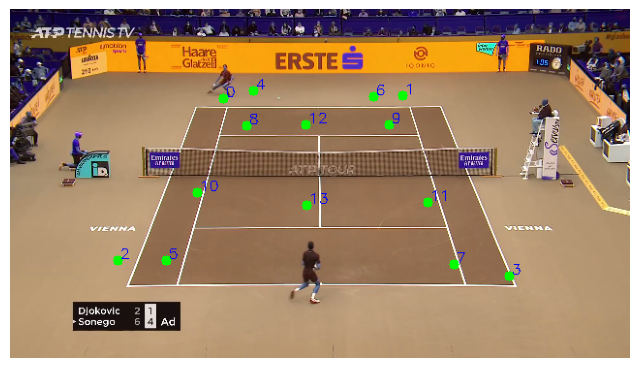

In [42]:
import torch, numpy as np, cv2, matplotlib.pyplot as plt

# Load best model
ckpt = torch.load("/content/drive/MyDrive/best_court_finetuned.pth", map_location=device)
model.load_state_dict(ckpt['model_state_dict'])
model.eval()

# Take a batch
imgs, hms = next(iter(train_loader))
preds = model(imgs.to(device)).cpu().detach().numpy()

# Visualize all 14 keypoints on the first image
img = imgs[1].permute(1,2,0).numpy() * 255
img = img.astype(np.uint8)
img = np.ascontiguousarray(img)

for i in range(14):
    hm = preds[0, i]
    y, x = np.unravel_index(hm.argmax(), hm.shape)
    cv2.circle(img, (x, y), 5, (0,255,0), -1)
    cv2.putText(img, str(i), (x+2, y-2),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')


In [41]:
import numpy as np
import torch

model.eval()
errors = []

with torch.no_grad():
    for imgs, hms in train_loader:
        preds = model(imgs.to(device)).cpu().numpy()  # (B,15,360,640)
        gt    = hms.numpy()                           # same shape
        B = preds.shape[0]
        for b in range(B):
            for i in range(14):
                # estrai coordinate predette
                hm_p = preds[b,i]
                y_p, x_p = np.unravel_index(hm_p.argmax(), hm_p.shape)
                # estrai coordinate GT
                hm_g = gt[b,i]
                y_g, x_g = np.unravel_index(hm_g.argmax(), hm_g.shape)
                errors.append((x_p-x_g)**2 + (y_p-y_g)**2)

errors = np.sqrt(np.mean(errors))
print(f"Mean RMSE over all keypoints: {errors:.1f} px")


Mean RMSE over all keypoints: 11.5 px


In [55]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import pandas as pd
import numpy as np
import math
from torchvision.transforms.functional import to_tensor


class PlayerTracker:
    def __init__(self,model_path):
        self.model = YOLO(model_path)

    def detect_frame(self,frame):
        results = self.model.track(frame, persist=True)[0]
        id_name_dict = results.names

        player_dict = {}
        for box in results.boxes:
            track_id = int(box.id.tolist()[0])
            result = box.xyxy.tolist()[0]
            object_cls_id = box.cls.tolist()[0]
            object_cls_name = id_name_dict[object_cls_id]
            if object_cls_name == "person":
                player_dict[track_id] = result

        return player_dict

    def draw_bboxes(self,video_frames, player_detections):
        output_video_frames = []
        for frame, player_dict in zip(video_frames, player_detections):
            # Draw Bounding Boxes
            for track_id, bbox in player_dict.items():
                x1, y1, x2, y2 = bbox
                cv2.putText(frame, f"Player ID: {track_id}",(int(bbox[0]),int(bbox[1] -10 )),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (197, 197, 197), 2)
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (197, 197, 197), 2)
            output_video_frames.append(frame)

        return output_video_frames


class BallTracker:
    def __init__(self,model_path):
        self.model = YOLO(model_path)

    def interpolate_ball_positions(self, ball_positions):
        ball_positions = [x.get(1,[]) for x in ball_positions]

        df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

        df_ball_positions = df_ball_positions.interpolate()
        df_ball_positions = df_ball_positions.bfill()

        ball_positions = [{1:x} for x in df_ball_positions.to_numpy().tolist()]

        return ball_positions


    def detect_frame(self,frame):
        results = self.model.predict(frame,conf=0.65,verbose=False)[0] ##save

        ball_dict = {}
        for box in results.boxes:
            result = box.xyxy.tolist()[0]
            ball_dict[1] = result

        return ball_dict


    def draw_bboxes(self,video_frames, player_detections):
        output_video_frames = []
        for frame, ball_dict in zip(video_frames, player_detections):
            # Draw Bounding Boxes
            for track_id, bbox in ball_dict.items():
                x1, y1, x2, y2 = bbox
                cv2.putText(frame, f"Ball ID: {track_id}",(int(bbox[0]),int(bbox[1] -10 )),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (96, 255, 168), 2)
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (96, 255, 168), 2)
            output_video_frames.append(frame)

        return output_video_frames

class KeypointTracker:
    def __init__(self, checkpoint_path, device='cuda'):
        self.device = device
        # Import della rete esatta dal repo
        from tracknet import BallTrackerNet
        # Carichiamo con out_channels=15
        self.model = BallTrackerNet(out_channels=15).to(device)
        # Caricamento state_dict puro
        state_dict = torch.load(checkpoint_path, map_location=device)
        # Correctly load the state_dict from the saved dictionary
        # Assuming the checkpoint file itself is the state_dict
        self.model.load_state_dict(state_dict)
        self.model.eval()
        # dimensione su cui il modello è stato allenato
        self.input_size = (640, 360)

    def detect_frame(self, frame):
        """
        Restituisce un dict {kp_index: (x,y)} con le coords
        dei 14 keypoint scalate alla risoluzione originale.
        """
        h0, w0 = frame.shape[:2]
        # ridimensiona per la rete
        small = cv2.resize(frame, self.input_size)
        inp = to_tensor(small).unsqueeze(0).to(self.device)
        with torch.no_grad():
            preds = self.model(inp)[0].cpu().numpy()  # shape (15,360,640)

        Hm, Wm = preds.shape[1:]
        coords = {}
        # Note: The model predicts 15 channels, but we only care about the first 14 keypoints for the court.
        for i in range(14):
            hm = preds[i]
            y, x = np.unravel_index(hm.argmax(), hm.shape)
            # scala indietro alla risoluzione originale
            x0 = int(x / Wm * w0)
            y0 = int(y / Hm * h0)
            coords[i] = (x0, y0)
        return coords

    def draw_keypoints(self, frames, detections, color=(0,255,0), radius=5):
        """
        Disegna un cerchietto per ogni keypoint su ciascun frame.
        """
        out = []
        for frame, det in zip(frames, detections):
            for (_, (x,y)) in det.items():
                cv2.circle(frame, (x,y), radius, color, -1)
            out.append(frame)
        return out

In [56]:
def main():

    input_video_path = "/content/drive/MyDrive/NeuralTennis/input/1.mp4"
    video_frames = read_video(input_video_path)

    player_tracker = PlayerTracker("/content/drive/MyDrive/NeuralTennis/models/yolov8x.pt")
    player_detections = [player_tracker.detect_frame(frame) for frame in video_frames]
    video_frames = player_tracker.draw_bboxes(video_frames, player_detections)

    ball_tracker = BallTracker("/content/drive/MyDrive/NeuralTennis/models/ball_training/run2/weights/best.pt")
    ball_detections = [ball_tracker.detect_frame(frame) for frame in video_frames]
    ball_detections = ball_tracker.interpolate_ball_positions(ball_detections)
    video_frames = ball_tracker.draw_bboxes(video_frames, ball_detections)


    #kp_tracker    = KeypointTracker("/content/drive/MyDrive/best_court_finetuned.pth")
    kp_tracker    = KeypointTracker("/content/drive/MyDrive/NeuralTennis/models/model_tennis_court_det.pt") #original weight
    kp_detections = [kp_tracker.detect_frame(f) for f in video_frames]
    video_frames  = kp_tracker.draw_keypoints(video_frames, kp_detections)


    save_video(video_frames, "/content/drive/MyDrive/NeuralTennis/output/1_kp_original.mp4")

if __name__ == "__main__":
    main()


0: 384x640 10 persons, 2 chairs, 2 clocks, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 chairs, 2 clocks, 19.5ms
Speed: 4.0ms preprocess, 19.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 chairs, 2 clocks, 13.0ms
Speed: 2.3ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 chairs, 2 clocks, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 chairs, 2 clocks, 13.3ms
Speed: 2.3ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 chairs, 2 clocks, 13.7ms
Speed: 2.4ms preprocess, 13.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 chairs, 2 clocks, 13.2ms
Speed: 2.4ms preprocess, 13.2ms inference, 2.0ms postprocess 